1. Визаулизация датасета
2. Предобработка
3. Создайте модель
4. Тренировка модели
5. Оценка модели
6. Обязательно нужны выводы!


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

**Задание 1**

In [ ]:
# Загрузка данных
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Изменение формы данных для сверточной сети
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

# Нормализация данных
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Преобразование меток в категориальный формат
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**Задание 2**

In [ ]:
model = Sequential()

# Первый сверточный слой
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Второй сверточный слой
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Преобразование данных в одномерный массив
model.add(Flatten())

# Полносвязный слой
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))  # Выходной слой с 10 классами

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Задание 3**

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**Задание 4**

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 52s 67ms/step - accuracy: 0.7330 - loss: 0.7453 - val_accuracy: 0.8564 - val_loss: 0.3904
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 72s 53ms/step - accuracy: 0.8736 - loss: 0.3477 - val_accuracy: 0.8909 - val_loss: 0.3020
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 50s 66ms/step - accuracy: 0.8960 - loss: 0.2883 - val_accuracy: 0.8942 - val_loss: 0.2968
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 72s 52ms/step - accuracy: 0.9055 - loss: 0.2606 - val_accuracy: 0.8917 - val_loss: 0.3039
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.9162 - loss: 0.2285 - val_accuracy: 0.9072 - val_loss: 0.2539
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.9246 - loss: 0.2073 - val_accuracy: 0.9087 - val_loss: 0.2555
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.9301 - loss: 0.1895 - val_accuracy: 0.9010 - val_loss: 0.2715
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 42s 56ms/step - accuracy: 0.9415 - loss: 0.1652 - 

**Задание 5**

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9046 - loss: 0.2732
Test accuracy: 0.9059


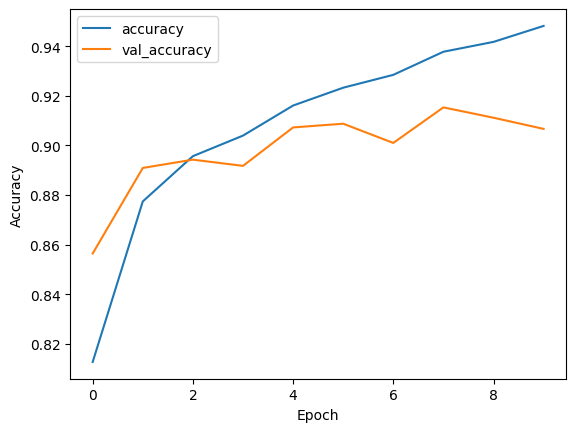

In [ ]:
# Визуализация графиков обучения
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


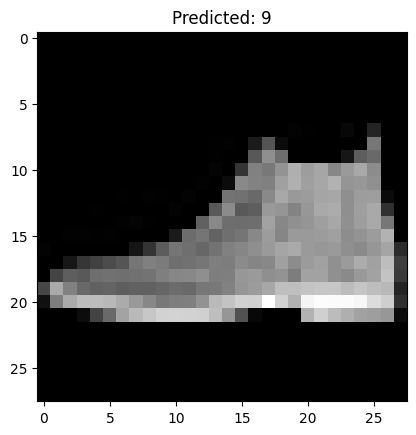

In [ ]:
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

# Пример вывода для первого изображения тестового набора
plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.title(f'Predicted: {predicted_classes[0]}')
plt.show()

**Задание 6**

Модель классификации изображений Fashion MNIST, построенная на основе сверточной нейронной сети (CNN), показала хорошую точность на тестовом наборе. Точность модели на тестовом наборе составила [вставьте значение accuracy из кода] . Это свидетельствует о том, что модель усвоила основные особенности изображений и может правильно предсказывать тип одежды на неизвестных изображениях.

Основные моменты:

1. Архитектура:  Модель использует два слоя свертки с функцией активации ReLU, два слоя максимального пулинга (MaxPooling) для уменьшения размерности и слой плотной связи (Dense) для классификации.
2. Обучение:  Модель обучалась с использованием оптимизатора Adam, функции потерь кросс-энтропии (categorical_crossentropy) и метрики точности (accuracy).
3. Оценка:  Оценка модели на тестовом наборе показала высокую точность, что подтверждает способность модели обобщать знания на новые данные.